# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this project, LeNet (CNN) is used for traffic sign recognition.

These are the steps to classify traffic sign images:

    1- Load traffic sign data
    
    2- Preprocess the images ( grayscale, normalize, resize)
    
    3- Split train and validation images
    
    3- Import LeNet and modify for this application
    
    4- Define hyperparameters
    
    5- Train the model
    
    6- Test on test data
    
    7- Test on traffic signs from web

---
## Step 0: Load The Data

In [25]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
end = -1
X_train, y_train = train['features'][0:end,::], train['labels'][0:end]
X_valid, y_valid = valid['features'][0:end,::], valid['labels'][0:end]
X_test, y_test = test['features'][0:end,::], test['labels'][0:end]

In [26]:
n_train = X_train.shape[0]
print(X_test.shape)

(12629, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [27]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_test.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34798
Number of validation examples = 4409
Number of testing examples = 12629
Image data shape = (32, 32, 3)
Number of classes = 12629


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [28]:
#import sing names 
import pandas as pd
df = pd.read_csv('signnames.csv', delimiter=',')
sign_names = [tuple(x) for x in df.values]
print(sign_names)

[(0, 'Speed limit (20km/h)'), (1, 'Speed limit (30km/h)'), (2, 'Speed limit (50km/h)'), (3, 'Speed limit (60km/h)'), (4, 'Speed limit (70km/h)'), (5, 'Speed limit (80km/h)'), (6, 'End of speed limit (80km/h)'), (7, 'Speed limit (100km/h)'), (8, 'Speed limit (120km/h)'), (9, 'No passing'), (10, 'No passing for vehicles over 3.5 metric tons'), (11, 'Right-of-way at the next intersection'), (12, 'Priority road'), (13, 'Yield'), (14, 'Stop'), (15, 'No vehicles'), (16, 'Vehicles over 3.5 metric tons prohibited'), (17, 'No entry'), (18, 'General caution'), (19, 'Dangerous curve to the left'), (20, 'Dangerous curve to the right'), (21, 'Double curve'), (22, 'Bumpy road'), (23, 'Slippery road'), (24, 'Road narrows on the right'), (25, 'Road work'), (26, 'Traffic signals'), (27, 'Pedestrians'), (28, 'Children crossing'), (29, 'Bicycles crossing'), (30, 'Beware of ice/snow'), (31, 'Wild animals crossing'), (32, 'End of all speed and passing limits'), (33, 'Turn right ahead'), (34, 'Turn left ahe

(1, 'Speed limit (30km/h)')


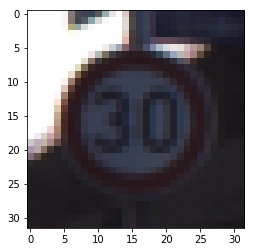

In [29]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

# imshow one random sample
index = random.randint(0, len(X_train))
image = X_train[index]

plt.figure()
plt.imshow(image)
print(sign_names[y_train[index]])

In [30]:
#training samples information and visulaization
num_sings_per_sample = np.bincount(y_train)
for sign in sign_names:
        print("Id {0}. Descriptio: {1} --- Number of this sign: {2}".format(sign[0], sign[1], 
                                               num_sings_per_sample[sign[0]]))


Id 0. Descriptio: Speed limit (20km/h) --- Number of this sign: 180
Id 1. Descriptio: Speed limit (30km/h) --- Number of this sign: 1980
Id 2. Descriptio: Speed limit (50km/h) --- Number of this sign: 2010
Id 3. Descriptio: Speed limit (60km/h) --- Number of this sign: 1260
Id 4. Descriptio: Speed limit (70km/h) --- Number of this sign: 1770
Id 5. Descriptio: Speed limit (80km/h) --- Number of this sign: 1650
Id 6. Descriptio: End of speed limit (80km/h) --- Number of this sign: 360
Id 7. Descriptio: Speed limit (100km/h) --- Number of this sign: 1290
Id 8. Descriptio: Speed limit (120km/h) --- Number of this sign: 1260
Id 9. Descriptio: No passing --- Number of this sign: 1320
Id 10. Descriptio: No passing for vehicles over 3.5 metric tons --- Number of this sign: 1800
Id 11. Descriptio: Right-of-way at the next intersection --- Number of this sign: 1170
Id 12. Descriptio: Priority road --- Number of this sign: 1890
Id 13. Descriptio: Yield --- Number of this sign: 1920
Id 14. Descrip

<class 'numpy.ndarray'>


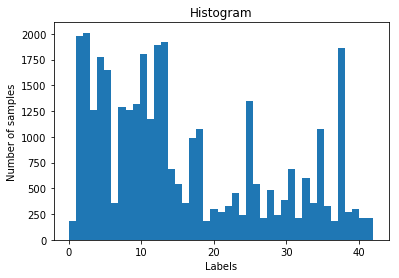

In [31]:
# Histogram of training samples
import matplotlib.pyplot as plt
print(type(y_train))
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.hist(y_train, bins = 43)
plt.title("Histogram")
plt.xlabel("Labels")
plt.ylabel("Number of samples")
plt.show()

Id 0: [9966, 10079, 10026, 9974, 9980]


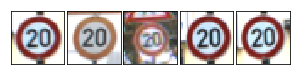

Id 1: [2691, 2541, 2326, 2341, 2264]


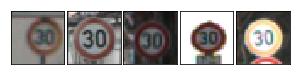

Id 2: [32029, 32857, 33031, 32204, 33219]


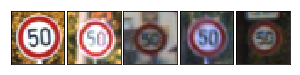

Id 3: [6248, 6117, 5647, 6021, 5623]


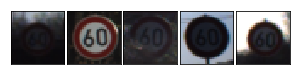

Id 4: [7698, 8502, 8475, 7997, 7386]


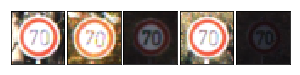

Id 5: [12589, 13468, 13652, 12835, 12990]


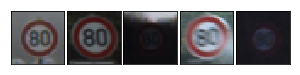

Id 6: [21629, 21761, 21768, 21710, 21643]


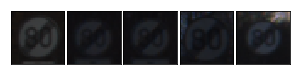

Id 7: [24299, 23819, 24179, 24447, 24178]


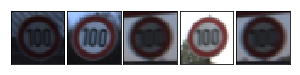

Id 8: [16122, 17082, 16307, 16501, 15926]


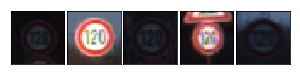

Id 9: [11304, 12044, 11320, 11175, 11513]


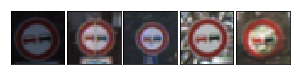

Id 10: [17934, 17648, 17718, 18123, 17861]


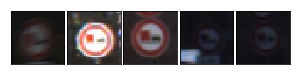

Id 11: [8703, 9554, 8892, 8833, 8651]


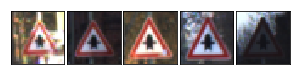

Id 12: [28024, 29168, 27955, 28365, 27944]


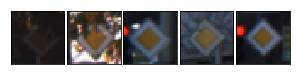

Id 13: [23175, 22659, 22019, 23665, 23546]


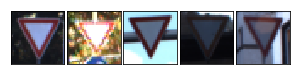

Id 14: [29691, 29561, 29393, 29825, 29797]


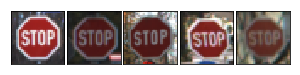

Id 15: [30378, 30171, 30181, 30390, 30102]


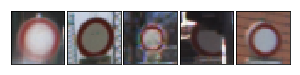

Id 16: [5342, 5336, 5337, 5168, 5360]


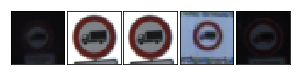

Id 17: [31156, 30734, 30798, 30873, 31317]


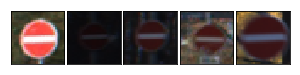

Id 18: [20489, 21047, 20736, 21099, 21328]


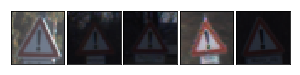

Id 19: [6768, 6750, 6631, 6647, 6657]


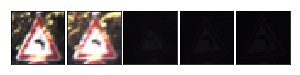

Id 20: [26182, 26007, 26201, 26117, 26224]


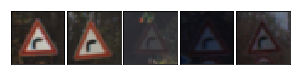

Id 21: [25855, 25802, 25682, 25904, 25791]


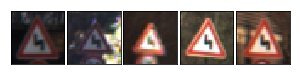

Id 22: [4723, 4668, 4659, 4772, 4643]


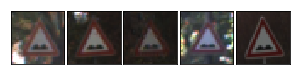

Id 23: [1968, 1992, 2189, 1945, 1989]


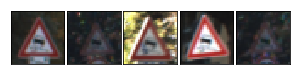

Id 24: [11026, 10960, 10834, 10861, 10852]


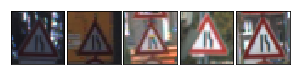

Id 25: [34792, 34172, 33966, 34323, 34071]


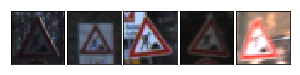

Id 26: [1445, 1679, 1697, 1588, 1495]


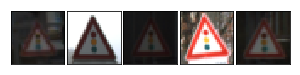

Id 27: [10421, 10369, 10521, 10445, 10506]


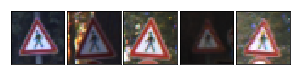

Id 28: [27296, 26901, 27287, 27095, 26963]


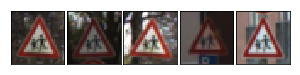

Id 29: [10659, 10580, 10571, 10600, 10736]


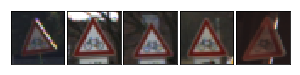

Id 30: [25050, 25250, 25210, 25097, 25240]


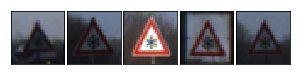

Id 31: [317, 627, 730, 800, 437]


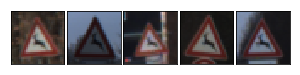

Id 32: [10310, 10319, 10328, 10169, 10315]


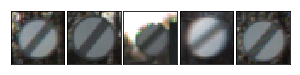

Id 33: [26479, 26459, 26384, 26516, 26392]


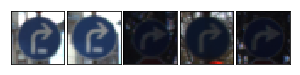

Id 34: [20199, 20250, 20237, 20342, 20080]


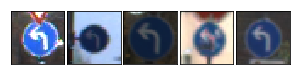

Id 35: [19143, 19467, 19936, 18936, 18937]


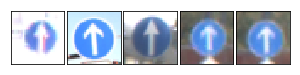

Id 36: [1091, 1011, 1006, 1103, 1032]


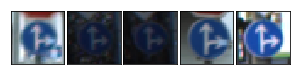

Id 37: [4976, 4869, 4985, 4898, 4948]


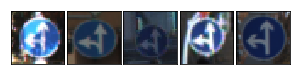

Id 38: [14340, 14233, 14164, 14970, 15409]


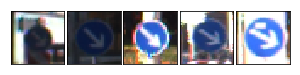

Id 39: [25656, 25465, 25673, 25561, 25629]


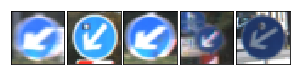

Id 40: [4405, 4441, 4337, 4325, 4349]


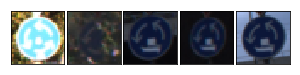

Id 41: [120, 48, 49, 132, 91]


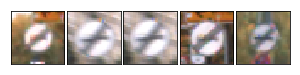

Id 42: [9904, 9805, 9777, 9911, 9957]


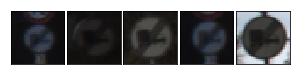

In [32]:
def plot_samples(X,y, num_samples = 5):
    for sign in sign_names:
        print("Id {0}: ".format(sign[0]),end='')
        random_samples = random.sample(list(np.where(y==sign[0])[0]), num_samples)
        print(random_samples)
        fig = plt.figure(figsize = (num_samples, 1))
        fig.subplots_adjust(hspace = 0, wspace = .05)
        for i in range(num_samples):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,num_samples, i+1, xticks=[], yticks=[])
            axis.imshow(image)
        plt.show()

plot_samples(X_train,y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

(32, 32, 3)
82.6784275497
82.1534556089


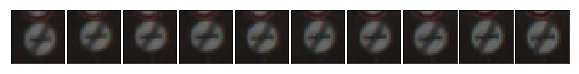

In [33]:
print((X_train[0].shape))
print(np.mean(X_train))
print(np.mean(X_test))
#plot_samples(X_train,y_train)
fig = plt.figure(figsize = (10, 1))
fig.subplots_adjust(hspace = 0, wspace = .05)
for i in range(10):
    image = X_train[i]
    axis = fig.add_subplot(1,10, i+1, xticks=[], yticks=[])
    axis.imshow(image.squeeze(), cmap='gray')

### Model Architecture

In [34]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet1(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables 
    #for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5,1, 6), mean = mu,
                                              stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], 
                           padding='VALID')+ conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], 
                           strides=[1, 2, 2, 1], padding='VALID')
    #print(conv1)
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), 
                                              mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], 
                           padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], 
                           strides=[1, 2, 2, 1], padding='VALID')
    #print("conv2: ", conv2)
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    #print("fc0:",  fc0)
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), 
                                            mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    #print("fc1: ", fc1)
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), 
                                             mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), 
                                             mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#logits = LeNet(x)

In [35]:

import pickle
import numpy as np
import tensorflow as tf
EPOCHS = 30
BATCH_SIZE = 128
# TODO: Fill this in based on where you saved the training and testing data

def preprocess1(images):
    grays = np.sum(images/3, axis = 3, keepdims = True)
    normalized = (grays - 128) /128
    return normalized

print(type(X_train))
X_train = preprocess1(X_train)
#X_valid = preprocess1(X_valid)
X_test = preprocess1(X_test)
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                               test_size=0.20, random_state=42)

<class 'numpy.ndarray'>


In [36]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
tf.reset_default_graph() 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
rate = 0.0005
logits = LeNet1(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y,
                                                        logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE],y_data[offset:offset+
                                                                   BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [37]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #print(i,X_train.shape)
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1), end ='')
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        


Training...

EPOCH 1 ...Validation Accuracy = 0.546

EPOCH 2 ...Validation Accuracy = 0.764

EPOCH 3 ...Validation Accuracy = 0.851

EPOCH 4 ...Validation Accuracy = 0.899

EPOCH 5 ...Validation Accuracy = 0.909

EPOCH 6 ...Validation Accuracy = 0.932

EPOCH 7 ...Validation Accuracy = 0.931

EPOCH 8 ...Validation Accuracy = 0.944

EPOCH 9 ...Validation Accuracy = 0.950

EPOCH 10 ...Validation Accuracy = 0.962

EPOCH 11 ...Validation Accuracy = 0.960

EPOCH 12 ...Validation Accuracy = 0.964

EPOCH 13 ...Validation Accuracy = 0.968

EPOCH 14 ...Validation Accuracy = 0.966

EPOCH 15 ...Validation Accuracy = 0.969

EPOCH 16 ...Validation Accuracy = 0.972

EPOCH 17 ...Validation Accuracy = 0.975

EPOCH 18 ...Validation Accuracy = 0.968

EPOCH 19 ...Validation Accuracy = 0.976

EPOCH 20 ...Validation Accuracy = 0.972

EPOCH 21 ...Validation Accuracy = 0.973

EPOCH 22 ...Validation Accuracy = 0.976

EPOCH 23 ...Validation Accuracy = 0.975

EPOCH 24 ...Validation Accuracy = 0.975

EPOCH 25 ...

In [38]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.922


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
# first 5 test images from German sing data set are selected for testing
os.listdir("Test Images for LeNet Model/")

['00001.ppm', '00002.ppm', '00004.ppm', '00003.ppm', '00005.ppm', '00000.ppm']

In [40]:
### Load the images and plot them here.

### Feel free to use as many code cells as needed.
    
images_list = os.listdir("Test Images for LeNet Model/")

test_images = []
test_labels = []
for image_name in images_list:
    if image_name.endswith(".ppm"):
        img =  cv2.cvtColor(cv2.imread('Test Images for LeNet Model/'+image_name), cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(img, (32, 32))
        test_images.append(resized_image)

test_labels = [1,38,11,33,38,16]


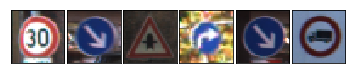

In [41]:
num_samples = 6
fig = plt.figure(figsize = (num_samples, 1))
fig.subplots_adjust(hspace = 0, wspace = .05)
for i in range(num_samples):
    image = test_images[i]
    axis = fig.add_subplot(1,num_samples, i+1, xticks=[], yticks=[])
    axis.imshow(image)
plt.show()

### Predict the Sign Type for Each Image

In [42]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline 
#used earlier.
### Feel free to use as many code cells as needed.
import numpy
print(test_labels)
top_k = 1
test_images = numpy.asarray(test_images)

print(type(test_images))
grays = np.sum(test_images/3, axis = 3, keepdims = True)
test_images = preprocess1(test_images)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=top_k), 
                   feed_dict={x:test_images})

print(top.indices.reshape(-1))
#print(test_images)

[1, 38, 11, 33, 38, 16]
<class 'numpy.ndarray'>
[ 1 38 11 33 38 16]


### Analyze Performance

In [43]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, 
###it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(test_images, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [44]:
### Print out the top five softmax probabilities for the 
###predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top_k = 5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=top_k), 
                   feed_dict={x:test_images})

print(top.indices)

[[ 1  5  0  2  4]
 [38  0  1  2  3]
 [11 30 27 20 24]
 [33 14 17 25 26]
 [38 23  2 34  0]
 [16 10  5  9  7]]
